In [46]:
import pandas as pd
BestDeals_df = pd.read_excel('/Users/rachana/Desktop/BestDeals_Clustering_Data.xlsx', sheet_name = 'Sheet1')
BestDeals_df.head()

,OFFER,RETAILER,BRAND,BRAND_BELONGS_TO_CATEGORY
0,Spend $50 on a Full-Priced new Club Membership,SAMS CLUB,SAMS CLUB,NaN
1,"Beyond Meat® Plant-Based products, spend $25",NaN,BEYOND MEAT,Plant-Based Meat
2,Good Humor Viennetta Frozen Vanilla Cake,NaN,GOOD HUMOR,Frozen Desserts
3,"Butterball, select varieties, spend $10 at Dil...",DILLONS FOOD STORE,BUTTERBALL,Nut Butters & Jam
4,"GATORADE® Fast Twitch®, 12-ounce 12 pack, at A...",AMAZON,GATORADE,Sports Drinks


In [47]:
# def fill_na_with_mode(df):
#     for column in df.columns:
#         if df[column].isna().any() and column != 'BRAND_BELONGS_TO_CATEGORY':
#             mode_value = df[column].mode()[0]
#             df[column].fillna(mode_value, inplace=True)
#         elif df[column].isna().any():
#             df[column].fillna('', inplace=True)  # Fill with empty value for brand_belongs_to_category
#     return df

# # Fill NaN values
# BestDeals_df = fill_na_with_mode(BestDeals_df)

# Fill missing values with mode
retailer_mode = BestDeals_df['RETAILER'].mode()[0]
brand_mode = BestDeals_df['BRAND'].mode()[0]
category_mode = BestDeals_df['BRAND_BELONGS_TO_CATEGORY'].mode()[0]

BestDeals_df['RETAILER'].fillna(retailer_mode, inplace=True)
BestDeals_df['BRAND'].fillna(brand_mode, inplace=True)
BestDeals_df['BRAND_BELONGS_TO_CATEGORY'].fillna(category_mode, inplace=True)

BestDeals_df.head()

,OFFER,RETAILER,BRAND,BRAND_BELONGS_TO_CATEGORY
0,Spend $50 on a Full-Priced new Club Membership,SAMS CLUB,SAMS CLUB,Cooking & Baking
1,"Beyond Meat® Plant-Based products, spend $25",WALMART,BEYOND MEAT,Plant-Based Meat
2,Good Humor Viennetta Frozen Vanilla Cake,WALMART,GOOD HUMOR,Frozen Desserts
3,"Butterball, select varieties, spend $10 at Dil...",DILLONS FOOD STORE,BUTTERBALL,Nut Butters & Jam
4,"GATORADE® Fast Twitch®, 12-ounce 12 pack, at A...",AMAZON,GATORADE,Sports Drinks


In [48]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(BestDeals_df[['RETAILER', 'BRAND', 'BRAND_BELONGS_TO_CATEGORY']]).toarray()

# Convert to DataFrame for better visualization
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['RETAILER', 'BRAND', 'BRAND_BELONGS_TO_CATEGORY']))
encoded_df

,RETAILER_ACME,RETAILER_ALBERTSONS,RETAILER_ALDI,RETAILER_AMAZON,RETAILER_BJS WHOLESALE,RETAILER_BLUE APRON,RETAILER_BURGER KING,RETAILER_CASEYS GENERAL STORE,RETAILER_CENTRAL MARKET,RETAILER_CHEWY,...,BRAND_BELONGS_TO_CATEGORY_Plant-Based Meat,BRAND_BELONGS_TO_CATEGORY_Prepared Meals,BRAND_BELONGS_TO_CATEGORY_Sauces & Marinades,BRAND_BELONGS_TO_CATEGORY_Skin Care,BRAND_BELONGS_TO_CATEGORY_Snack Cakes,BRAND_BELONGS_TO_CATEGORY_Spirits,BRAND_BELONGS_TO_CATEGORY_Sports Drinks,BRAND_BELONGS_TO_CATEGORY_Water,BRAND_BELONGS_TO_CATEGORY_Wine,BRAND_BELONGS_TO_CATEGORY_Yogurt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(encoded_df)
BestDeals_df['Cluster'] = kmeans.labels_

In [50]:
import numpy as np

def predict_cluster(new_data, encoder, kmeans):
    # Transform the new data using the same One-Hot Encoder
    encoded_new_data = encoder.transform(new_data).toarray()
    # Predict the cluster
    cluster_label = kmeans.predict(encoded_new_data)
    return cluster_label[0], encoded_new_data


In [65]:
# Define function to find similar offers with relevance scores
def find_similar_offers(new_data, encoder, kmeans, df, encoded_df):
    cluster_label, encoded_new_data = predict_cluster(new_data, encoder, kmeans)
    
    cluster_offers = df[df['Cluster'] == cluster_label]
    encoded_cluster_data = encoded_df[df['Cluster'] == cluster_label]
    
    distances = euclidean_distances(encoded_new_data, encoded_cluster_data)
    similarity_scores = 1 / (1 + distances)
    
    cluster_offers = cluster_offers.copy()
    cluster_offers['Distance'] = distances.flatten()
    cluster_offers['Similarity Score'] = similarity_scores.flatten()
    
    # Normalize the similarity scores
    min_score = cluster_offers['Similarity Score'].min()
    max_score = cluster_offers['Similarity Score'].max()
    cluster_offers['Normalized Similarity Score'] = (
        (cluster_offers['Similarity Score'] - min_score) / (max_score - min_score)
    )
    
    similar_offers = cluster_offers.sort_values(by='Normalized Similarity Score', ascending = False)
    similar_offers = similar_offers.loc[similar_offers['Normalized Similarity Score'] >= 0.1] 
    
    return similar_offers[['OFFER', 'RETAILER', 'BRAND', 'BRAND_BELONGS_TO_CATEGORY', 'Distance', 'Normalized Similarity Score']]

new_data = pd.DataFrame({
    'RETAILER': ['WALMART'],
    'BRAND': ['BAI'],
    'BRAND_BELONGS_TO_CATEGORY': ['Fruit Juices']
})

similar_offers = find_similar_offers(new_data, encoder, kmeans, BestDeals_df, encoded_data)
similar_offers

/Users/rachana/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,OFFER,RETAILER,BRAND,BRAND_BELONGS_TO_CATEGORY,Distance,Normalized Similarity Score
291,"Bai® Antioxidant, 6 pack, at Walmart",WALMART,BAI,Fruit Juices,0.000000,1.00000
61,"Bai® Antioxidant, 6 pack, buy 2 at Walmart",WALMART,BAI,Fruit Juices,0.000000,1.00000
296,"SKITTLES®, select sizes",WALMART,SKITTLES,Fruit Juices,1.414214,0.12132
228,"SKITTLES®, select varieties",WALMART,SKITTLES,Fruit Juices,1.414214,0.12132


In [44]:
# Define function to find similar offers
def find_similar_offers(new_data, encoder, kmeans, df, encoded_df):
    cluster_label, encoded_new_data = predict_cluster(new_data, encoder, kmeans)
    
    cluster_offers = df[df['Cluster'] == cluster_label]
    
    distances = euclidean_distances(encoded_new_data, encoded_df[df['Cluster'] == cluster_label])
    
    cluster_offers = cluster_offers.copy()  # Avoid SettingWithCopyWarning
    cluster_offers['Distance'] = distances.flatten()
    
    similar_offers = cluster_offers.sort_values(by='Distance')
    
    return similar_offers[['OFFER', 'RETAILER', 'BRAND', 'BRAND_BELONGS_TO_CATEGORY', 'Distance']]


# # Function to create new data based on a single feature
# def create_new_data(feature, value):
#     if feature == 'RETAILER':
#         return pd.DataFrame({'RETAILER': [value], 'BRAND': [brand_mode], 'BRAND_BELONGS_TO_CATEGORY': [category_mode]})
#     elif feature == 'BRAND':
#         return pd.DataFrame({'RETAILER': [retailer_mode], 'BRAND': [value], 'BRAND_BELONGS_TO_CATEGORY': [category_mode]})
#     elif feature == 'BRAND_BELONGS_TO_CATEGORY':
#         return pd.DataFrame({'RETAILER': [retailer_mode], 'BRAND': [brand_mode], 'BRAND_BELONGS_TO_CATEGORY': [value]})

# Example new data point based on a single feature
new_data = pd.DataFrame({
    'RETAILER': ['KING SOOPERS'],
    'BRAND': ['BUTTERBALL'],
    'BRAND_BELONGS_TO_CATEGORY': ['Nut Butters & Jam']
})

similar_offers = find_similar_offers(new_data, encoder, kmeans, BestDeals_df, encoded_data)
similar_offers


/Users/rachana/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,OFFER,RETAILER,BRAND,BRAND_BELONGS_TO_CATEGORY,Distance
32,"Butterball, select varieties, spend $10 at Kin...",KING SOOPERS,BUTTERBALL,Nut Butters & Jam,0.000000
3,"Butterball, select varieties, spend $10 at Dil...",DILLONS FOOD STORE,BUTTERBALL,Nut Butters & Jam,1.414214
155,"Butterball, select varieties, spend $10 at Smi...",SMITHS,BUTTERBALL,Nut Butters & Jam,1.414214
239,"Butterball, select varieties, spend $10 at Fry...",FRYS FOOD STORE,BUTTERBALL,Nut Butters & Jam,1.414214
136,"Butterball, select varieties, spend $10 at Kroger",KROGER,BUTTERBALL,Nut Butters & Jam,1.414214
...,...,...,...,...,...
122,"Reese's Peanut Butter Bar, 6 count, at GIANT O...",THE GIANT CO,GOOD HUMOR,Frozen Desserts,2.449490
116,"Perfect Keto Bars, online at Amazon",AMAZON,PERFECT KETO,Medicines & Treatments,2.449490
113,"Perfect Keto Beauty + Sleep Collagen, online a...",AMAZON,PERFECT KETO,Medicines & Treatments,2.449490
148,"Welch's® Fruit Snacks, 250 count, online at Am...",AMAZON,WELCHS FRUIT SNACKS,Fruit & Vegetable Snacks,2.449490


In [9]:
# Add cluster labels to the original dataframe
BestDeals_df['Cluster'] = labels
print(BestDeals_df)

                                                 OFFER            RETAILER  \
0       Spend $50 on a Full-Priced new Club Membership           SAMS CLUB   
1         Beyond Meat® Plant-Based products, spend $25             WALMART   
2             Good Humor Viennetta Frozen Vanilla Cake             WALMART   
3    Butterball, select varieties, spend $10 at Dil...  DILLONS FOOD STORE   
4    GATORADE® Fast Twitch®, 12-ounce 12 pack, at A...              AMAZON   
..                                                 ...                 ...   
380                                   Spend $10 at KFC                 KFC   
381                                   Sargento Product             WALMART   
382                               Thomas'® Bagel Thins             WALMART   
383                            Spend $270 at Pavilions           PAVILIONS   
384  Back to the Roots Soils, select varieties, at ...             WALMART   

                 BRAND BRAND_BELONGS_TO_CATEGORY  Cluster  
0  

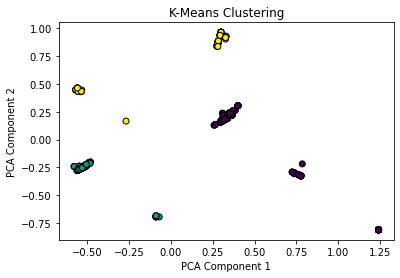

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualize the clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(encoded_df)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()